# University of Nevada Reno Geodetic Lab GPS Time Series Analysis

In [3]:
from IPython.display import Image 
Image(url='http://geodesy.unr.edu/images/magnet-station-header.png')

In [4]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
os.environ['GPS_DATA'] = '/Users/scott/Documents/GitHub/gpstools/ungl/data'
os.environ['UNGL_DATA'] = '/Users/scott/Documents/GitHub/gpstools/ungl/'
import gpstools as gps

In [5]:
plt.style.use('seaborn-white')
%matplotlib notebook

# Load time series

In [44]:
# We'll use station TPW2
station = 'TPW2'
refframe= 'NA12'
# Download data
tenv3 = gps.ungl.download_data(station, refframe, overwrite=True, outdir=os.environ['GPS_DATA'])

In [45]:
# Load the timeseries as pandas dataframe
df = gps.ungl.load_tenv3(tenv3)

In [46]:
df.head()

,site,date,decyear,mjd,week,day,reflon,e0,east,n0,north,u0,up,ant,sig_e,sig_n,sig_u,corr_en,corr_eu,corr_nu
date,,,,,,,,,,,,,,,,,,,,
2000-03-31,TPW2,00MAR31,2000.2464,51634,1055,6,-123.8,2441,0.687219,5119136,0.073529,-14,-0.944852,0.08,0.000729,0.000923,0.003120,0.091481,-0.180537,-0.209910
2000-04-01,TPW2,00APR01,2000.2491,51635,1055,7,-123.8,2441,0.687549,5119136,0.075676,-14,-0.940698,0.08,0.000721,0.000912,0.003025,0.091498,-0.161388,-0.171950
2000-04-02,TPW2,00APR02,2000.2519,51636,1056,1,-123.8,2441,0.688879,5119136,0.073305,-14,-0.948931,0.08,0.000718,0.000929,0.003059,0.155179,-0.195528,-0.192915
2000-04-03,TPW2,00APR03,2000.2546,51637,1056,2,-123.8,2441,0.687747,5119136,0.072907,-14,-0.944940,0.08,0.000708,0.000889,0.002975,0.062229,-0.198331,-0.157280
2000-04-04,TPW2,00APR04,2000.2574,51638,1056,3,-123.8,2441,0.687764,5119136,0.074849,-14,-0.952582,0.08,0.000710,0.000892,0.003076,0.088018,-0.198483,-0.239275


# Plot the time series

<IPython.core.display.Javascript object>


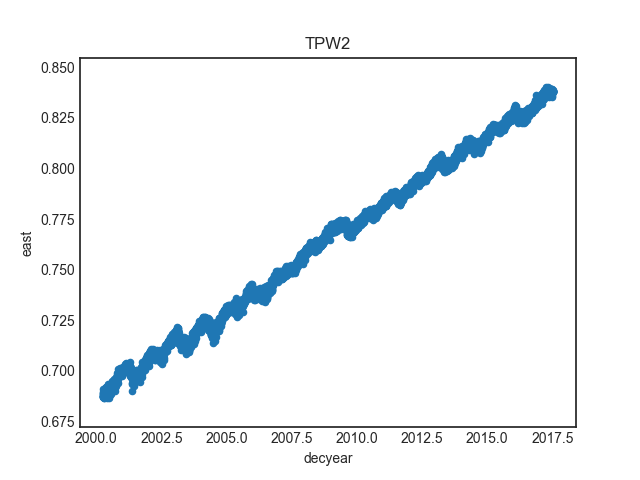

In [47]:
ax = df.plot.scatter('decyear', 'east', title=station)

<IPython.core.display.Javascript object>


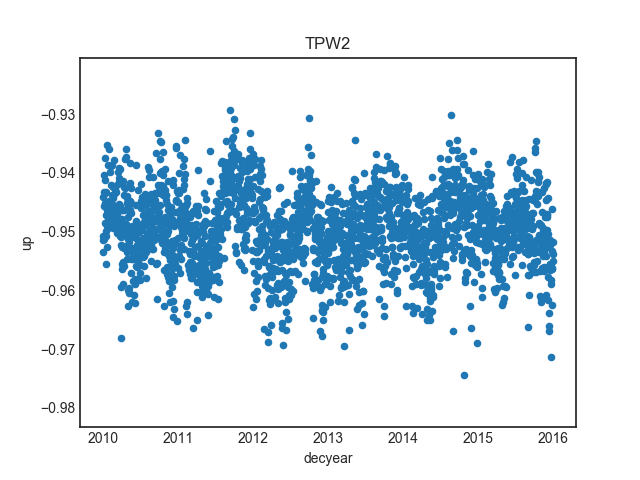

In [48]:
# Particular date range
df['2010/01/01':'2015/12/31'].plot.scatter('decyear', 'up', title=station)

<IPython.core.display.Javascript object>


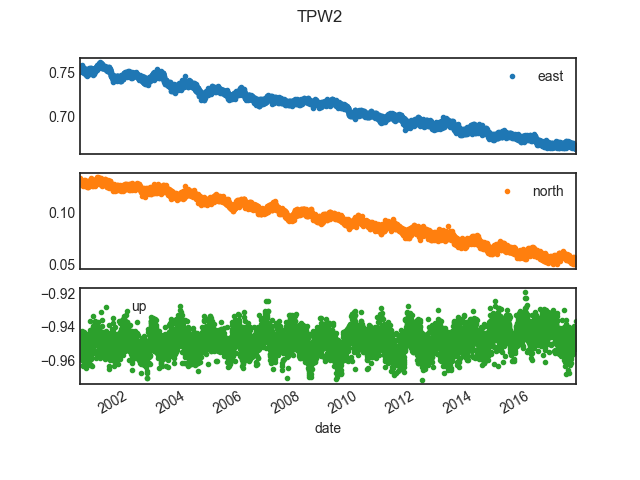

In [35]:
axes = df.plot(y=['east','north','up'], style='.' ,sharex=True, subplots=True, title=station)

# Load station info and steps database

In [85]:
dfs = gps.ungl.load_stations(station=station)

In [86]:
dfs.head()

,site,lat,lon,height,start,end
13873,TPW2,46.2074,236.2316,-14.973,2000-03-31,2017-01-21


In [53]:
df1,df2= gps.ungl.load_steps(station)

In [55]:
df1.head() #associated with equipment changes

,site,date,code,note
0,TPW2,2007-01-25,1,Receiver_Type_Changed


In [56]:
df2.head() #associated with earthquakes

,site,date,code,thresh_d,distance,mag,id
0,TPW2,1999-07-03,2,125.893,99.846,5.8,gcmtb070399a
1,TPW2,1999-07-03,2,125.893,99.132,5.8,uw10474303
2,TPW2,2001-02-28,2,398.107,131.444,6.8,uw10530748
3,TPW2,2005-06-15,2,630.957,573.980,7.2,usp000dt25
4,TPW2,2012-10-28,2,1258.925,946.127,7.8,usp000juhz


In [ ]:
# Want information on one of these earthquakes? insert 'id' into this URL:
# https://earthquake.usgs.gov/earthquakes/eventpage/uw10474303

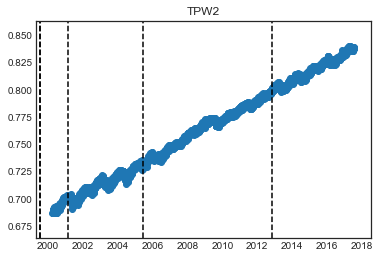

In [82]:
# plot steps with the time series
%matplotlib inline 
#not sure why not working interactively?
plt.scatter(df.index, df.east, label='East')
for i in range(len(df2)):
    plt.axvline(df2.date.iloc[i], color='k', linestyle='dashed', label='nearby EQ')
plt.title(station)
#plt.legend()

# Simple Map showing station location

In [84]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

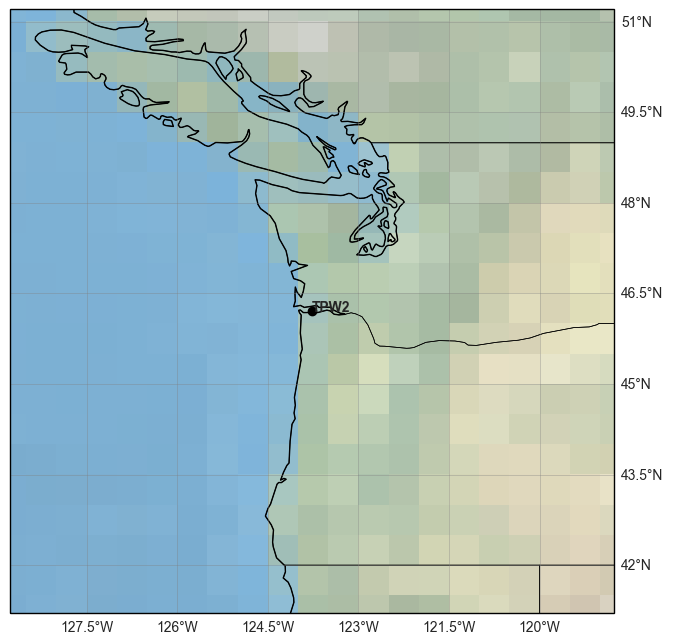

In [93]:
plot_CRS = ccrs.PlateCarree()
geodetic_CRS = ccrs.Geodetic()

# frame station by box of several degrees
frame=5 #degrees
x0, y0 = plot_CRS.transform_point(dfs.lon-frame, dfs.lat-frame, geodetic_CRS)
x1, y1 = plot_CRS.transform_point(dfs.lon+frame, dfs.lat+frame, geodetic_CRS)
    
fig,ax = plt.subplots(figsize=(8,8), dpi=100, 
                      subplot_kw=dict(projection=plot_CRS))

ax.set_xlim((x0, x1))
ax.set_ylim((y0, y1))
ax.plot(dfs.lon, dfs.lat, 'ko',transform=geodetic_CRS)
ax.text(dfs.lon, dfs.lat, station, fontweight='bold', transform=geodetic_CRS)

ax.stock_img() # very low-res, but fast!
ax.coastlines(resolution='50m') #10m is highest res

states = cfeature.NaturalEarthFeature(scale='50m',
                                 category='cultural',
                                 name='admin_1_states_provinces_lakes')
ax.add_feature(states, facecolor='none', edgecolor='k',linewidth=0.5)

gl = ax.gridlines(ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5, linestyle='-')
gl.xlabels_top = False
gl.ylabels_left = False
#gl.xlines = False
#gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Fit velocity to timeseries

In [96]:
# Load MIDAS information
dfm = gps.ungl.load_midas(station, refframe)

In [97]:
dfm

,site,version,start,end,years,epochs,epochs_good,pairs,east,north,...,e0,n0,u0,out_e,out_n,out_u,sig_e,sig_n,sig_u,nsteps
5838,TPW2,MIDAS4,2000.2464,2017.5359,17.2895,6256,5781,8958,0.008387,0.007084,...,0.004275,0.003091,-0.007793,0.016,0.056,0.045,0.003364,0.001973,0.008029,4


In [ ]:
#plot timeseries with midas fits
#df = gps.ungl.add_midas()
df.plot_

In [ ]:
# Compare to database of ETS events:

p1 = pd.Period('2010-08')
p1.start_time
p1.end_time
df[p1]